In [ ]:
# 1. Write a Python script to visualize the distribution of errors (residuals) for a multiple linear regression model using Seaborn's "diamonds" dataset.

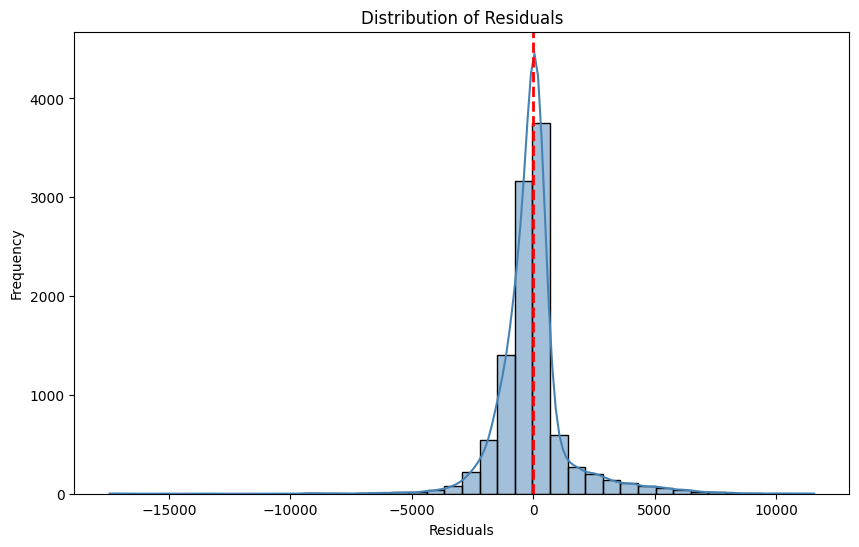

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Drop rows with missing values (if any)
diamonds.dropna(inplace=True)

# Select numeric predictors for simplicity
features = ['carat', 'depth', 'table', 'x', 'y', 'z']
X = diamonds[features]
y = diamonds['price']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Plot the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=40, color='steelblue')
plt.axvline(0, color='red', linestyle='--', linewidth=2)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [ ]:
#2. Write a Python script to calculate and print Mean Squared Error (MSE), Mean Absolute Error (MAE), and Root Mean Squared Error (RMSE) for a linear regression model.

In [3]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Drop any missing values (if present)
diamonds.dropna(inplace=True)

# Use numeric features for simplicity
features = ['carat', 'depth', 'table', 'x', 'y', 'z']
X = diamonds[features]
y = diamonds['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the results
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 2242178.9040856035
Mean Absolute Error (MAE): 888.4808633901026
Root Mean Squared Error (RMSE): 1497.3906985438382


In [ ]:
# 3. Write a Python script to check if the assumptions of linear regression are met. Use a scatter plot to check linearity, residuals plot for homoscedasticity, and correlation matrix for multicollinearity

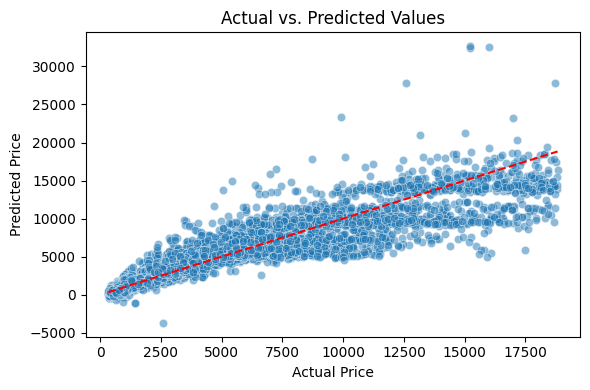

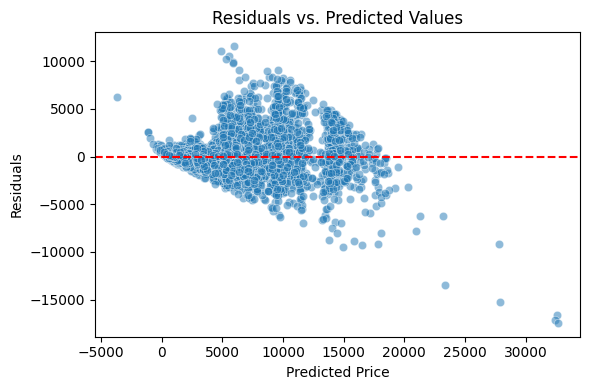

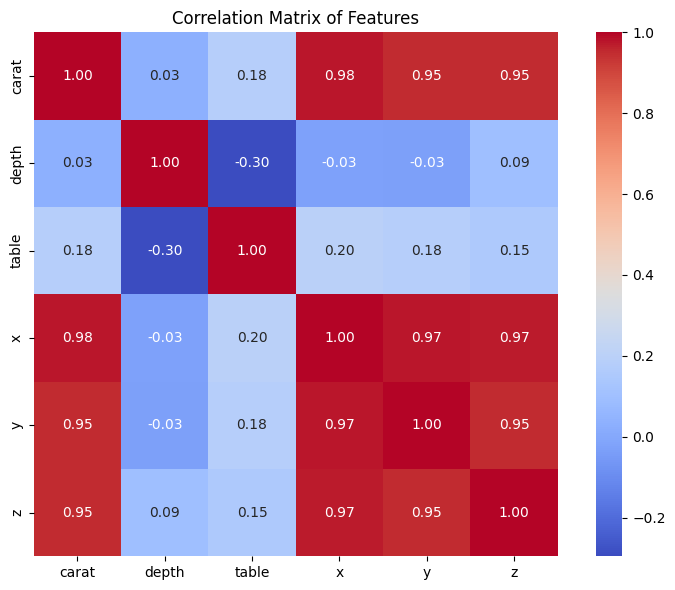

In [4]:


# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')
diamonds.dropna(inplace=True)

# Use numeric features for simplicity
features = ['carat', 'depth', 'table', 'x', 'y', 'z']
X = diamonds[features]
y = diamonds['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
residuals = y_test - y_pred

# 1. Check Linearity: Actual vs. Predicted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.tight_layout()
plt.show()

# 2. Check Homoscedasticity: Residuals vs. Predicted
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

# 3. Check Multicollinearity: Correlation matrix
plt.figure(figsize=(8, 6))
corr_matrix = X.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()


In [ ]:
# 4. Write a Python script that creates a machine learning pipeline with feature scaling and evaluates the performance of different regression models

In [8]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')
diamonds.dropna(inplace=True)

# Select features and target variable
features = ['carat', 'depth', 'table', 'x', 'y', 'z']
X = diamonds[features]
y = diamonds['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a dictionary to hold different regression models
models = {
    'Linear Regression': LinearRegression(),
    'Support Vector Regression': SVR(),
    'Gradient Boosting Regression': GradientBoostingRegressor(random_state=42)
}

# Initialize a list to store evaluation results
results = []

# Loop over the models to evaluate them
for model_name, model in models.items():
    # Create a pipeline with feature scaling and the current model
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Feature scaling
        ('regressor', model)           # Regression model
    ])

    # Fit the model on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = pipeline.predict(X_test)

    # Evaluate performance using MSE, MAE, RMSE, and R-squared
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = mse**0.5
    r2 = r2_score(y_test, y_pred)

    # Store results in the results list
    results.append({
        'Model': model_name,
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'R-squared': r2
    })

# Create a DataFrame to show the evaluation results
results_df = pd.DataFrame(results)
print(results_df)


                          Model           MSE          MAE         RMSE  \
0             Linear Regression  2.242179e+06   888.480863  1497.390699   
1     Support Vector Regression  6.978859e+06  1290.399530  2641.752927   
2  Gradient Boosting Regression  1.806313e+06   771.881703  1343.991576   

   R-squared  
0   0.858954  
1   0.560990  
2   0.886373  


In [ ]:
#5. Implement a simple linear regression model on a dataset and print the model's coefficients, intercept, and R-squared score

In [9]:

from sklearn.metrics import r2_score

# Load the diamonds dataset
diamonds = sns.load_dataset('diamonds')
diamonds.dropna(inplace=True)

# Select the independent (X) and dependent (y) variables
X = diamonds[['carat']]  # simple regression with one feature
y = diamonds['price']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Print model details
print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)
print("R-squared score:", r2_score(y_test, y_pred))


Coefficient (slope): 7768.910490360821
Intercept: -2261.9117456492177
R-squared score: 0.8489390686155808


In [ ]:
# 6. Write a Python script that analyzes the relationship between total bill and tip in the 'tips' dataset using simple linear regression and visualizes the results.

Coefficient (slope): 0.10696370685268658
Intercept: 0.925235558557056
R-squared Score: 0.5449381659234664


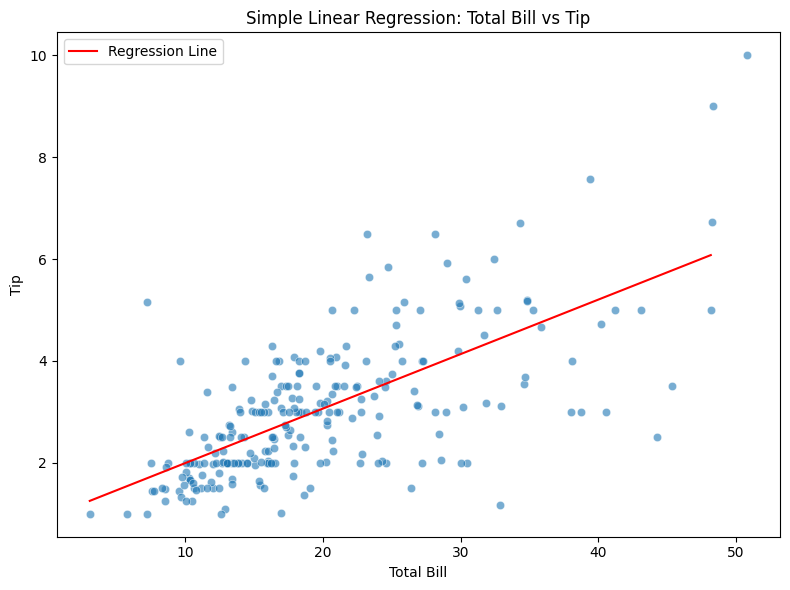

In [10]:

# Load the tips dataset
tips = sns.load_dataset('tips')

# Define features and target
X = tips[['total_bill']]  # independent variable
y = tips['tip']           # dependent variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Print model coefficients
print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)
print("R-squared Score:", r2_score(y_test, y_pred))

# Visualization: Scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=tips, alpha=0.6)
sns.lineplot(x=X_test['total_bill'], y=y_pred, color='red', label='Regression Line')
plt.title('Simple Linear Regression: Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# 7. Write a Python script that fits a linear regression model to a synthetic dataset with one feature. Use the model to predict new values and plot the data points along with the regression line.

Coefficient (slope): 44.43716999225497
Intercept: 1.1651153205269726


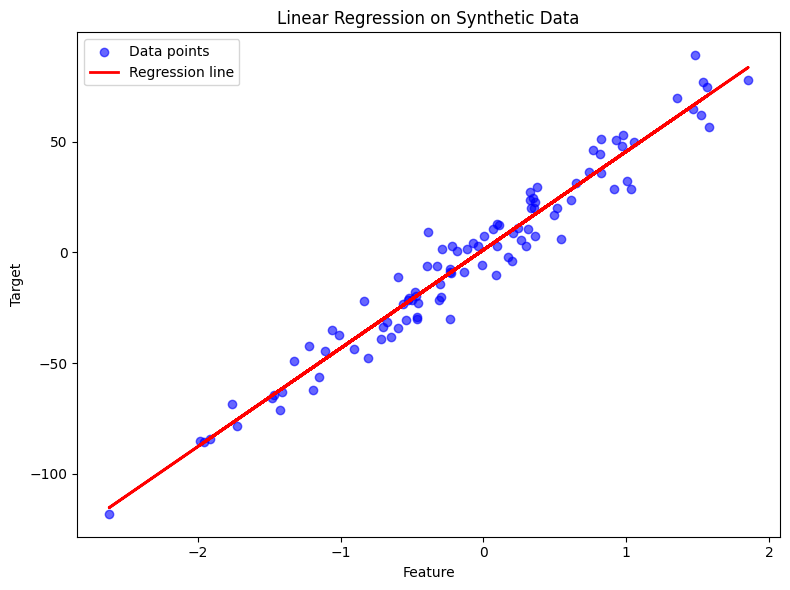

In [12]:
from sklearn.datasets import make_regression

# Generate synthetic dataset
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Predict using the model
y_pred = model.predict(X)

# Print model parameters
print("Coefficient (slope):", model.coef_[0])
print("Intercept:", model.intercept_)

# Plot the data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.6, label='Data points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression line')
plt.title('Linear Regression on Synthetic Data')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# 8. Write a Python script that pickles a trained linear regression model and saves it to a file.

In [13]:
import pickle


# Step 1: Generate synthetic data
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

# Step 2: Train a Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Step 3: Pickle the trained model and save to file
filename = 'linear_regression_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model has been trained and saved to '{filename}'")


Model has been trained and saved to 'linear_regression_model.pkl'


In [ ]:
# 9. Write a Python script that fits a polynomial regression model (degree 2) to a dataset and plots the regression curve.

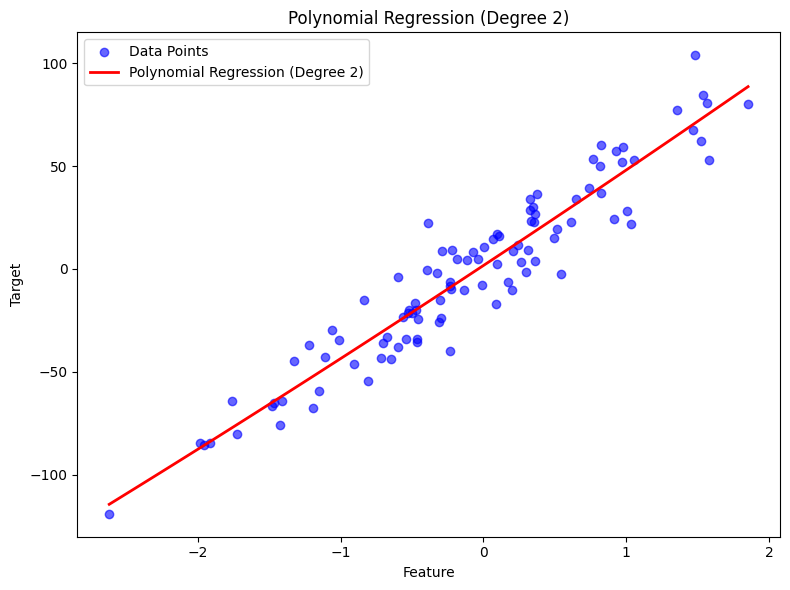

In [16]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

# Generate synthetic dataset
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)
# Add some non-linearity to the target
y = y + 0.5 * (X.flatten() ** 2)

# Reshape X for consistency
X = X.reshape(-1, 1)

# Create a pipeline with polynomial features (degree 2) and linear regression
model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())

# Fit the model
model.fit(X, y)

# Predict for plotting
X_plot = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_plot = model.predict(X_plot)

# Plot the original data and the polynomial regression curve
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.6, label='Data Points')
plt.plot(X_plot, y_plot, color='red', linewidth=2, label='Polynomial Regression (Degree 2)')
plt.title('Polynomial Regression (Degree 2)')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# 10. Generate synthetic data for simple linear regression (use random values for X and y) and fit a linear regression model to the data. Print the model's coefficient and intercept.

In [17]:


# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
X = 2 * np.random.rand(100, 1)  # 100 random values between 0 and 2
y = 4 + 3 * X + np.random.randn(100, 1)  # y = 4 + 3x + noise

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Print model parameters
print("Coefficient (slope):", model.coef_[0][0])
print("Intercept:", model.intercept_[0])


Coefficient (slope): 2.7701133864384837
Intercept: 4.215096157546747


In [ ]:
# 11. Write a Python script that fits polynomial regression models of different degrees to a synthetic dataset and compares their performance.

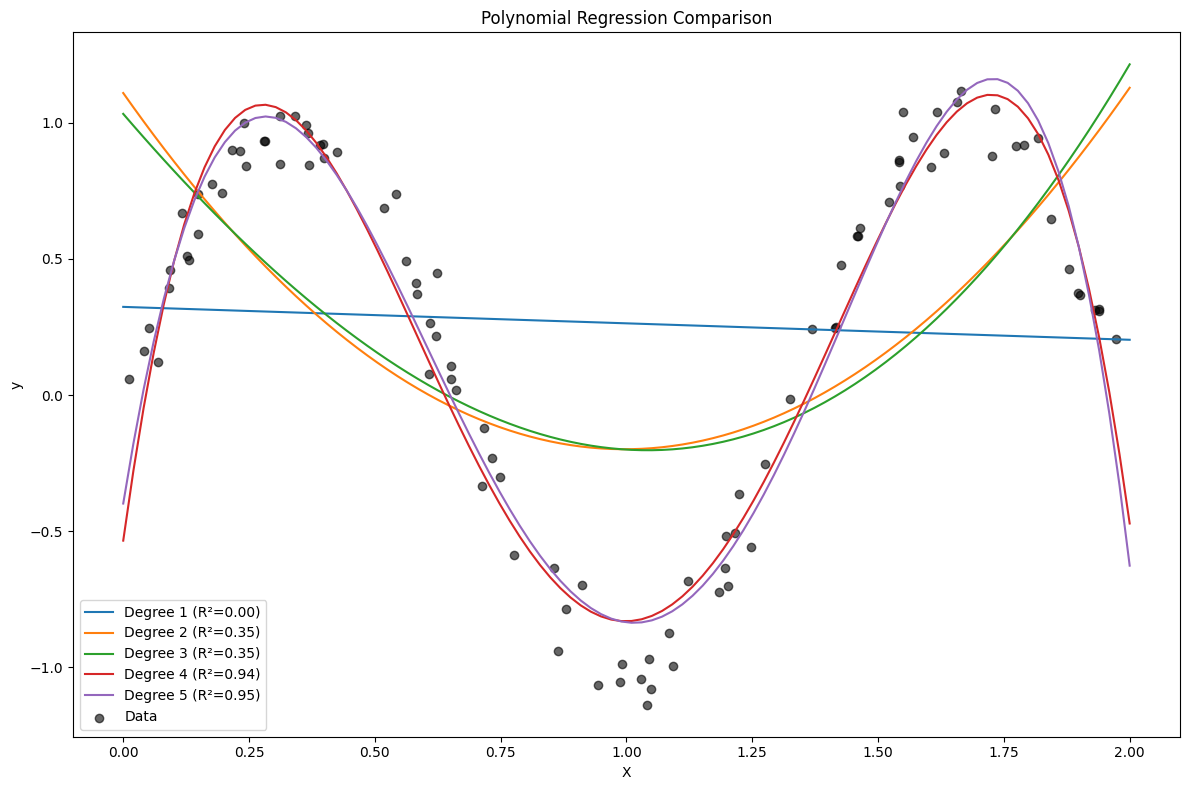

In [18]:


# Step 1: Generate synthetic non-linear data
np.random.seed(42)
X = np.sort(2 * np.random.rand(100, 1), axis=0)
y = np.sin(1.5 * np.pi * X).ravel() + 0.1 * np.random.randn(100)

# Step 2: Fit and evaluate polynomial regression models of different degrees
degrees = [1, 2, 3, 4, 5]
plt.figure(figsize=(12, 8))
X_plot = np.linspace(0, 2, 100).reshape(-1, 1)

for degree in degrees:
    # Create pipeline
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)

    # Predict and calculate R^2 score
    y_pred = model.predict(X)
    r2 = r2_score(y, y_pred)

    # Predict for plotting
    y_plot = model.predict(X_plot)

    # Plot
    plt.plot(X_plot, y_plot, label=f"Degree {degree} (R²={r2:.2f})")

# Plot the original data
plt.scatter(X, y, color='black', alpha=0.6, label='Data')
plt.title('Polynomial Regression Comparison')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# 12. Write a Python script that fits a simple linear regression model with two features and prints the model's coefficients, intercept, and R-squared score.

In [19]:

# Load the dataset
diamonds = sns.load_dataset('diamonds')
diamonds.dropna(inplace=True)

# Select two features and the target
X = diamonds[['carat', 'depth']]
y = diamonds['price']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Print the results
print("Coefficients:")
print(f"  carat: {model.coef_[0]}")
print(f"  depth: {model.coef_[1]}")
print("Intercept:", model.intercept_)
print("R-squared score:", r2_score(y_test, y_pred))


Coefficients:
  carat: 7778.741244258532
  depth: -99.77691694026845
Intercept: 3890.771743834406
R-squared score: 0.850562709988032


In [ ]:
# 13. Write a Python script that generates synthetic data, fits a linear regression model, and visualizes the regression line along with the data points.

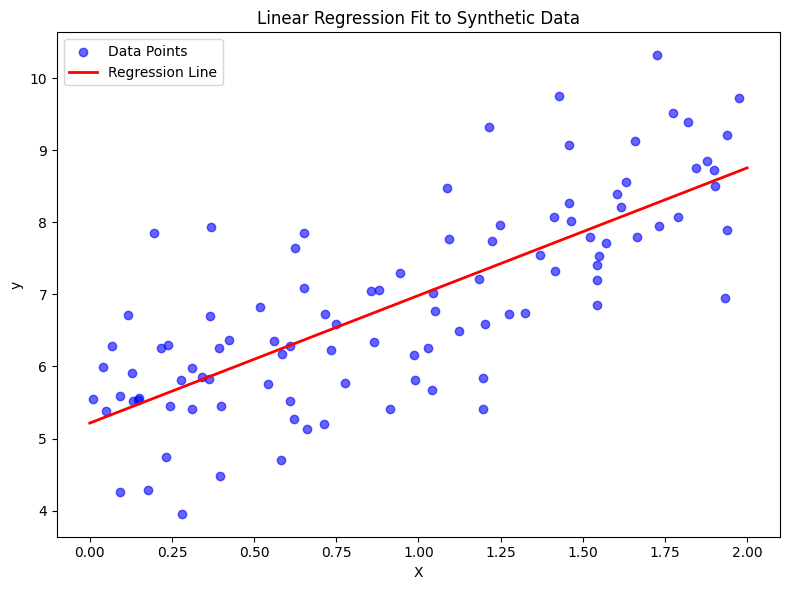

Coefficient (slope): 1.7701133864384844
Intercept: 5.215096157546748


In [20]:


# Step 1: Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)          # 100 values between 0 and 2
y = 5 + 2 * X + np.random.randn(100, 1) # y = 5 + 2x + noise

# Step 2: Fit the Linear Regression model
model = LinearRegression()
model.fit(X, y)

# Step 3: Predict values for the regression line
X_new = np.linspace(0, 2, 100).reshape(-1, 1)
y_pred = model.predict(X_new)

# Step 4: Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.6, label='Data Points')
plt.plot(X_new, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression Fit to Synthetic Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()

# Optional: print model parameters
print("Coefficient (slope):", model.coef_[0][0])
print("Intercept:", model.intercept_[0])


In [ ]:
# 14. Write a Python script that uses the Variance Inflation Factor (VIF) to check for multicollinearity in a dataset with multiple features

In [21]:

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Load the dataset and drop missing values
diamonds = sns.load_dataset('diamonds').dropna()

# Select numerical features for multicollinearity check
features = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]

# Standardize the features for better VIF interpretation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Create a DataFrame for the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=features.columns)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X_scaled_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]

# Display VIF values
print(vif_data)


  Feature        VIF
0   carat  21.602712
1   depth   1.496590
2   table   1.143225
3       x  56.187704
4       y  20.454295
5       z  23.530049


In [ ]:
# 15. Write a Python script that generates synthetic data for a polynomial relationship (degree 4), fits a polynomial regression model, and plots the regression curve.

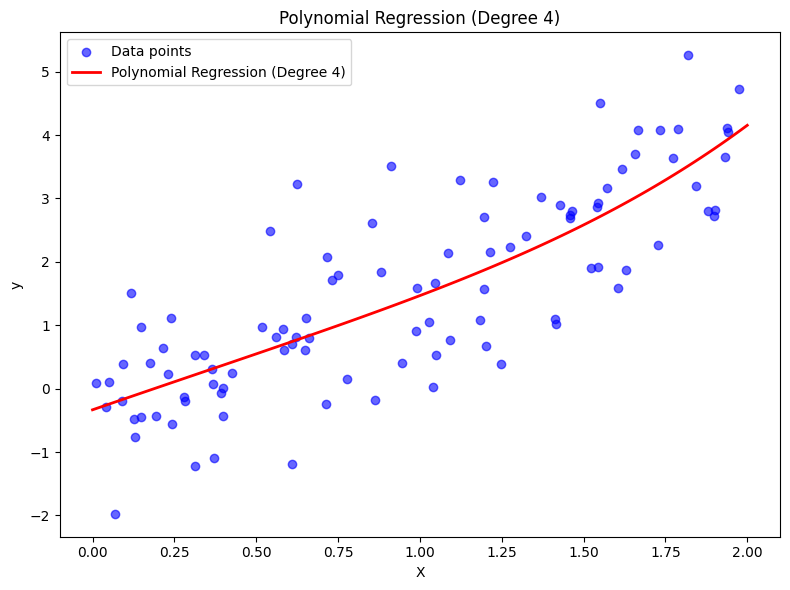

In [22]:

# Step 1: Generate synthetic data with a polynomial relationship (degree 4)
np.random.seed(42)
X = np.sort(2 * np.random.rand(100, 1), axis=0)  # Random X values between 0 and 2
y = 0.5 * X**4 - 2 * X**3 + 3 * X**2 + np.random.randn(100, 1)  # Polynomial relationship (degree 4)

# Step 2: Fit a Polynomial Regression model (degree 4)
poly_features = PolynomialFeatures(degree=4)
X_poly = poly_features.fit_transform(X)

# Fit the model
model = LinearRegression()
model.fit(X_poly, y)

# Step 3: Make predictions for the plot
X_plot = np.linspace(0, 2, 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
y_plot = model.predict(X_plot_poly)

# Step 4: Visualize the data and regression curve
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.6, label='Data points')
plt.plot(X_plot, y_plot, color='red', linewidth=2, label='Polynomial Regression (Degree 4)')
plt.title('Polynomial Regression (Degree 4)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# 16. Write a Python script that creates a machine learning pipeline with data standardization and a multiple linear regression model, and prints the R-squared score.

In [23]:


# Load the dataset and drop missing values
diamonds = sns.load_dataset('diamonds').dropna()

# Select features and target for regression
X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z']]
y = diamonds['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 1: Create a pipeline with standardization and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('regressor', LinearRegression())  # Linear regression model
])

# Step 2: Train the model using the pipeline
pipeline.fit(X_train, y_train)

# Step 3: Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Step 4: Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)


R-squared score: 0.8589542625888938


In [ ]:
# 17. Write a Python script that performs polynomial regression (degree 3) on a synthetic dataset and plots the regression curve.




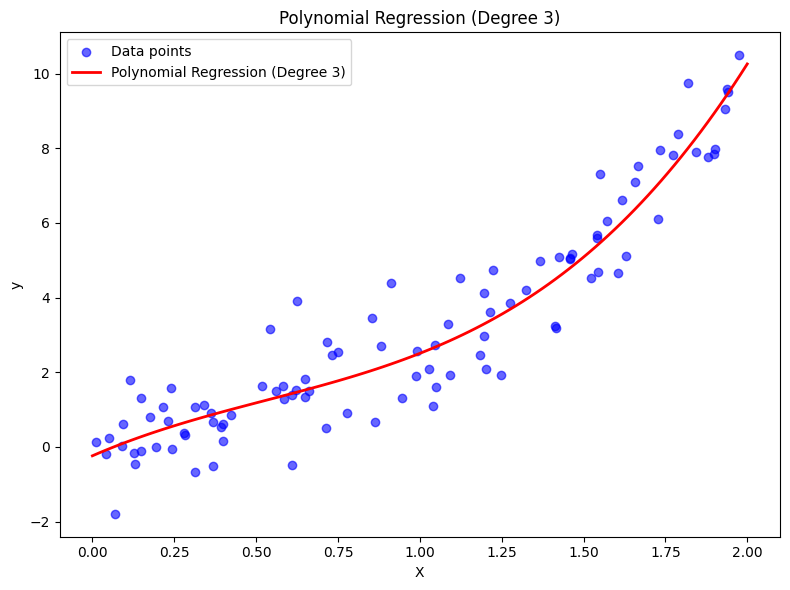

In [24]:


# Step 1: Generate synthetic data with a polynomial relationship (degree 3)
np.random.seed(42)
X = np.sort(2 * np.random.rand(100, 1), axis=0)  # Random X values between 0 and 2
y = 1.5 * X**3 - 2 * X**2 + 3 * X + np.random.randn(100, 1)  # Polynomial relationship (degree 3)

# Step 2: Fit a Polynomial Regression model (degree 3)
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)

# Fit the model
model = LinearRegression()
model.fit(X_poly, y)

# Step 3: Make predictions for the plot
X_plot = np.linspace(0, 2, 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
y_plot = model.predict(X_plot_poly)

# Step 4: Visualize the data and regression curve
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.6, label='Data points')
plt.plot(X_plot, y_plot, color='red', linewidth=2, label='Polynomial Regression (Degree 3)')
plt.title('Polynomial Regression (Degree 3)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#18. Write a Python script that performs multiple linear regression on a synthetic dataset with 5 features. Print the R-squared score and model coefficients.

In [25]:


# Step 1: Generate synthetic data with 5 features
np.random.seed(42)

# Generate random features (100 samples, 5 features)
X = np.random.rand(100, 5)

# Generate a linear target variable y = 5 + 3*x1 - 2*x2 + 4*x3 + x4 - x5 + noise
y = 5 + 3 * X[:, 0] - 2 * X[:, 1] + 4 * X[:, 2] + X[:, 3] - X[:, 4] + np.random.randn(100)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Fit the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 5: Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Step 6: Print the results
print("R-squared score:", r2)
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


R-squared score: 0.5850965834667521
Model Coefficients: [ 2.65295867 -2.23392333  4.64790329  1.1455846  -1.44564017]
Model Intercept: 5.14598474398699


In [ ]:
#19. Write a Python script that generates synthetic data for linear regression, fits a model, and visualizes the data points along with the regression line.

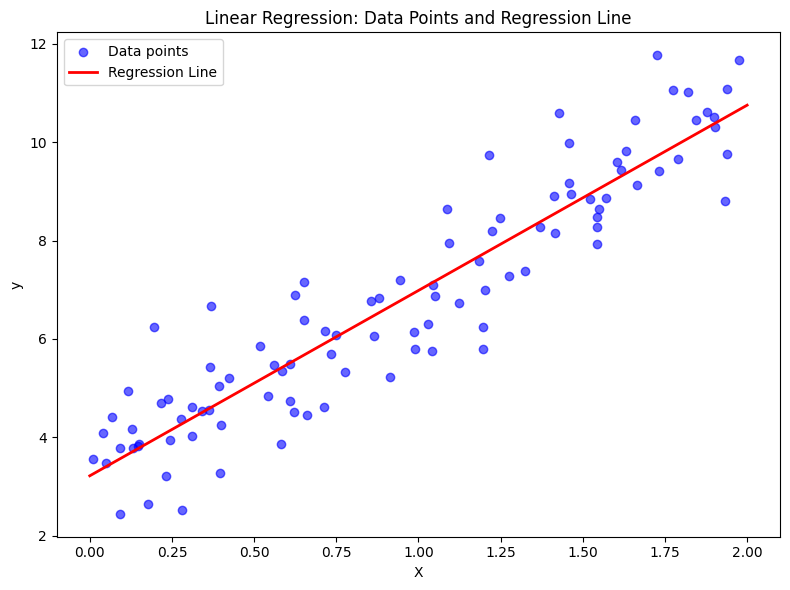

Coefficient (slope): 3.7701133864384846
Intercept: 3.2150961575467467


In [26]:


# Step 1: Generate synthetic data for linear regression
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Random feature values between 0 and 2
y = 3 + 4 * X + np.random.randn(100, 1)  # Linear relationship with some noise (y = 3 + 4x + noise)

# Step 2: Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Step 3: Make predictions for the regression line
X_line = np.linspace(0, 2, 100).reshape(-1, 1)
y_line = model.predict(X_line)

# Step 4: Visualize the data and regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', alpha=0.6, label='Data points')
plt.plot(X_line, y_line, color='red', linewidth=2, label='Regression Line')
plt.title('Linear Regression: Data Points and Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.tight_layout()
plt.show()

# Optional: Print model parameters
print("Coefficient (slope):", model.coef_[0][0])
print("Intercept:", model.intercept_[0])


In [ ]:
#20. Create a synthetic dataset with 3 features and perform multiple linear regression. Print the model's Rsquared score and coefficients.

In [27]:


# Step 1: Generate synthetic data with 3 features
np.random.seed(42)

# Generate random features (100 samples, 3 features)
X = np.random.rand(100, 3)

# Generate a linear target variable y = 5 + 2*x1 - 3*x2 + 4*x3 + noise
y = 5 + 2 * X[:, 0] - 3 * X[:, 1] + 4 * X[:, 2] + np.random.randn(100)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Fit the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 5: Calculate R-squared score
r2 = r2_score(y_test, y_pred)

# Step 6: Print the results
print("R-squared score:", r2)
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


R-squared score: 0.4629214431721308
Model Coefficients: [ 2.10589767 -3.07539401  4.68605925]
Model Intercept: 4.914989558367079


In [ ]:
# 21. Write a Python script that demonstrates how to serialize and deserialize machine learning models using joblib instead of pickling.

In [28]:
import joblib

# Step 1: Generate synthetic data for a linear regression model
np.random.seed(42)

# Generate random features (100 samples, 1 feature)
X = np.random.rand(100, 1)
y = 5 + 3 * X + np.random.randn(100, 1)  # Linear relationship with some noise

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Save the model using joblib (serialize)
joblib.dump(model, 'linear_regression_model.joblib')
print("Model saved as 'linear_regression_model.joblib'")

# Step 5: Load the model from the file (deserialize)
loaded_model = joblib.load('linear_regression_model.joblib')
print("Model loaded successfully!")

# Step 6: Use the loaded model for predictions
y_pred = loaded_model.predict(X_test)

# Step 7: Print the model's coefficients and intercept
print("Model Coefficients:", loaded_model.coef_)
print("Model Intercept:", loaded_model.intercept_)

# Optionally, you can evaluate the model's performance (e.g., R-squared score)
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")


Model saved as 'linear_regression_model.joblib'
Model loaded successfully!
Model Coefficients: [[2.59864731]]
Model Intercept: [5.14291332]
R-squared score: 0.4203137289819704


In [ ]:
# 22. Write a Python script to perform linear regression with categorical features using one-hot encoding. Use the Seaborn 'tips' dataset.

In [30]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

# Step 1: Load the 'tips' dataset from Seaborn
tips = sns.load_dataset('tips')

# Step 2: Check for missing values in the dataset
print("Missing values in the dataset:")
print(tips.isnull().sum())

# Step 3: Drop rows with missing values (if any)
tips = tips.dropna()

# Step 4: Select features and target variable
X = tips[['total_bill', 'sex', 'smoker', 'day', 'time']]  # Features
y = tips['tip']  # Target variable

# Step 5: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Create a column transformer to one-hot encode categorical features
column_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['sex', 'smoker', 'day', 'time']),  # One-hot encoding for categorical features
        ('num', 'passthrough', ['total_bill'])  # Keep the numerical feature 'total_bill' as is
    ])

# Step 7: Create a pipeline with the column transformer and linear regression
pipeline = Pipeline(steps=[
    ('preprocessor', column_transformer),  # Apply preprocessing (one-hot encoding)
    ('regressor', LinearRegression())  # Fit a linear regression model
])

# Step 8: Train the model
pipeline.fit(X_train, y_train)

# Step 9: Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Step 10: Calculate the R-squared score
r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2}")

# Optional: Print model coefficients (for linear regression)
# After one-hot encoding, the coefficients correspond to the encoded features
regressor = pipeline.named_steps['regressor']
encoded_columns = pipeline.named_steps['preprocessor'].transformers_[0][1].get_feature_names_out(['sex', 'smoker', 'day', 'time'])

# Print the coefficients along with the feature names
coefficients = pd.DataFrame({
    'Feature': ['total_bill'] + list(encoded_columns),
    'Coefficient': [regressor.intercept_] + list(regressor.coef_)
})

print("\nModel Coefficients:")
print(coefficients)


Missing values in the dataset:
total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64
R-squared score: 0.47735804203610954


ValueError: All arrays must be of the same length

In [ ]:
# 23. Compare Ridge Regression with Linear Regression on a synthetic dataset and print the coefficients and Rsquared score.

Linear Regression Coefficients: [ 2.65295867 -2.23392333  1.64790329  0.1455846  -0.44564017]
Ridge Regression Coefficients: [ 2.31924334 -1.97874557  1.36885488  0.12790327 -0.39738209]

Linear Regression R-squared score: 0.5577806409184407
Ridge Regression R-squared score: 0.5355726785420574

Model Coefficients Comparison:
     Feature  Linear Regression  Ridge Regression
0  Feature 1           2.652959          2.319243
1  Feature 2          -2.233923         -1.978746
2  Feature 3           1.647903          1.368855
3  Feature 4           0.145585          0.127903
4  Feature 5          -0.445640         -0.397382


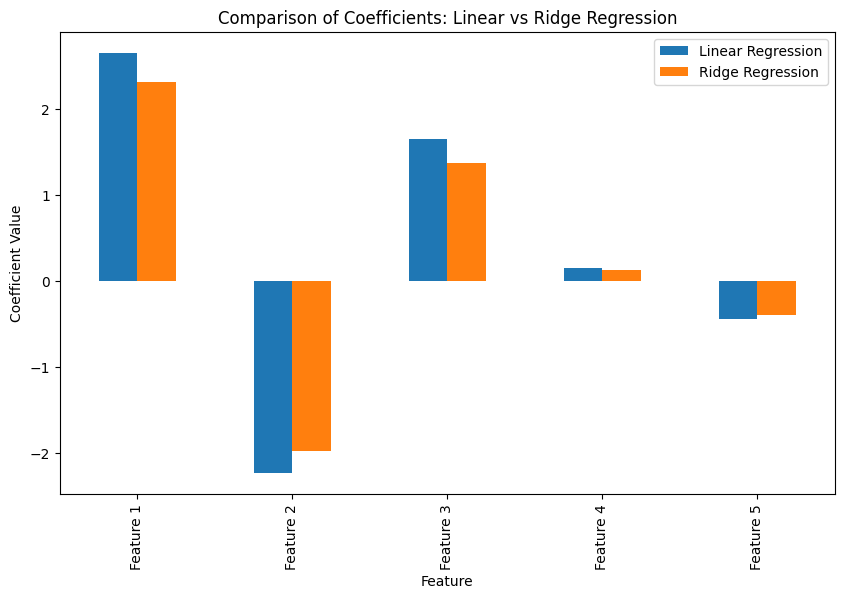

In [35]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Step 1: Generate synthetic data
np.random.seed(42)

# Generate random features (100 samples, 5 features)
X = np.random.rand(100, 5)

# Create a linear relationship with some noise for the target variable
y = 5 + 3 * X[:, 0] - 2 * X[:, 1] + X[:, 2] + np.random.randn(100)

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize both models
linear_regressor = LinearRegression()
ridge_regressor = Ridge(alpha=1.0)  # Regularization parameter

# Step 4: Fit the models
linear_regressor.fit(X_train, y_train)
ridge_regressor.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred_linear = linear_regressor.predict(X_test)
y_pred_ridge = ridge_regressor.predict(X_test)

# Step 6: Calculate R-squared scores for both models
r2_linear = r2_score(y_test, y_pred_linear)
r2_ridge = r2_score(y_test, y_pred_ridge)

# Step 7: Print the coefficients and R-squared scores
print("Linear Regression Coefficients:", linear_regressor.coef_)
print("Ridge Regression Coefficients:", ridge_regressor.coef_)
print("\nLinear Regression R-squared score:", r2_linear)
print("Ridge Regression R-squared score:", r2_ridge)

# Optional: Plot the coefficients for both models
coefficients_df = pd.DataFrame({
    'Feature': [f'Feature {i+1}' for i in range(X.shape[1])],
    'Linear Regression': linear_regressor.coef_,
    'Ridge Regression': ridge_regressor.coef_
})

print("\nModel Coefficients Comparison:")
print(coefficients_df)

# Plot the coefficients comparison
coefficients_df.plot(x='Feature', kind='bar', figsize=(10, 6))
plt.title('Comparison of Coefficients: Linear vs Ridge Regression')
plt.ylabel('Coefficient Value')
plt.show()


In [ ]:
# 24. Write a Python script that uses cross-validation to evaluate a Linear Regression model on a synthetic dataset

Cross-validation scores (Negative MSE): [-105.37149135 -152.97022134  -74.33931136 -123.31425969  -72.59312938]

Mean of Cross-validation Scores: -105.7176826234917
Standard Deviation of Cross-validation Scores: 30.411839797924806


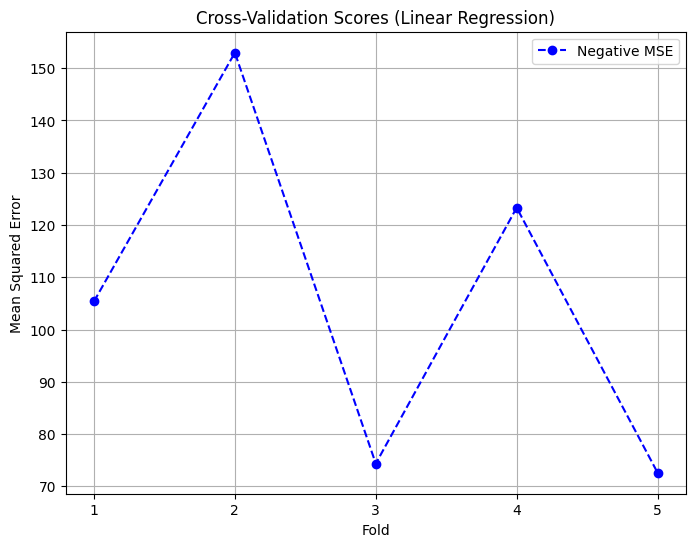

In [36]:

from sklearn.model_selection import cross_val_score


# Step 1: Generate a synthetic dataset
np.random.seed(42)

# Generate a synthetic dataset with 100 samples, 5 features, and some noise
X, y = make_regression(n_samples=100, n_features=5, noise=10, random_state=42)

# Step 2: Initialize the Linear Regression model
linear_regressor = LinearRegression()

# Step 3: Use K-fold cross-validation to evaluate the model
# We will use 5 folds in this case
cv_scores = cross_val_score(linear_regressor, X, y, cv=5, scoring='neg_mean_squared_error')

# Step 4: Print the cross-validation scores (negative MSE)
print("Cross-validation scores (Negative MSE):", cv_scores)

# Step 5: Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

# Print the results
print("\nMean of Cross-validation Scores:", mean_cv_score)
print("Standard Deviation of Cross-validation Scores:", std_cv_score)

# Step 6: Visualize the cross-validation scores
plt.figure(figsize=(8, 6))
plt.plot(range(1, 6), -cv_scores, marker='o', linestyle='--', color='b', label='Negative MSE')
plt.title('Cross-Validation Scores (Linear Regression)')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.xticks(range(1, 6))
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
# 25. Write a Python script that compares polynomial regression models of different degrees and prints the Rsquared score for each.

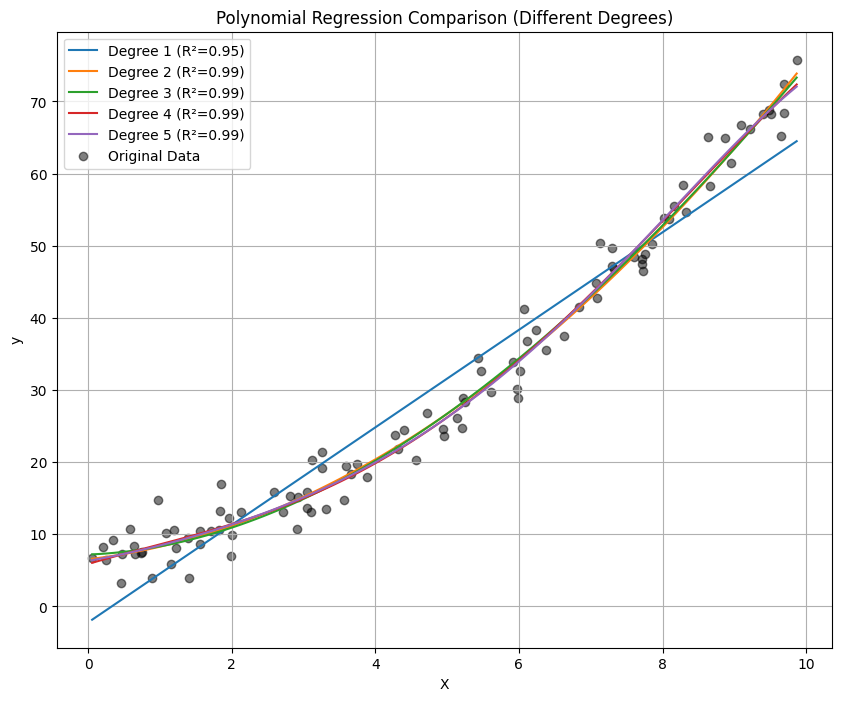

Degree 1 R-squared score: 0.9543
Degree 2 R-squared score: 0.9873
Degree 3 R-squared score: 0.9872
Degree 4 R-squared score: 0.9862
Degree 5 R-squared score: 0.9863


In [37]:


# Step 1: Generate synthetic data
np.random.seed(42)

# Generate random data (100 samples, 1 feature)
X = np.random.rand(100, 1) * 10  # Random values between 0 and 10
y = 5 + 2 * X + 0.5 * X**2 + np.random.randn(100, 1) * 3  # Quadratic relationship with noise

# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Initialize a Linear Regression model
linear_regressor = LinearRegression()

# Step 4: Compare Polynomial Regression for different degrees
degrees = [1, 2, 3, 4, 5]  # Polynomial degrees to test
r2_scores = []  # To store R-squared scores

plt.figure(figsize=(10, 8))

# Step 5: Train and evaluate polynomial regression models for each degree
for degree in degrees:
    # Create polynomial features for the given degree
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly_train = polynomial_features.fit_transform(X_train)
    X_poly_test = polynomial_features.transform(X_test)

    # Train the model
    linear_regressor.fit(X_poly_train, y_train)

    # Make predictions on the test set
    y_pred = linear_regressor.predict(X_poly_test)

    # Calculate the R-squared score for the model
    r2 = r2_score(y_test, y_pred)
    r2_scores.append(r2)

    # Plot the polynomial regression curve
    x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    x_range_poly = polynomial_features.transform(x_range)
    y_range = linear_regressor.predict(x_range_poly)

    plt.plot(x_range, y_range, label=f'Degree {degree} (R²={r2:.2f})')

# Step 6: Plot the original data and all polynomial regression curves
plt.scatter(X, y, color='black', alpha=0.5, label='Original Data')
plt.title('Polynomial Regression Comparison (Different Degrees)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Step 7: Print R-squared scores for each degree
for i, degree in enumerate(degrees):
    print(f"Degree {degree} R-squared score: {r2_scores[i]:.4f}")
